In [1]:
#importing required librairies
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
# the function finds a solution to the example found in the literature. It calculates the solution through an extention to Q. 
def findSolution():
    k=4 #Set chromatic number.
    R.<w> = PolynomialRing(QQ) #Define the polynomial ring.
    F.<w> = NumberField(w^(2)+1) #Define the number field over the 4th cyclotomic polynomial.
    R = PolynomialRing(F,7, names='x', order='degrevlex') #Extend the polynomial ring.
    
    x = R.gens() #Declare the vertice variables.
    numberOfVertices = len(x) 
    
    index = list(range(0, numberOfVertices)) #Declare the vertice indeces.
    
    edges = [(0,1),(0,3),(0,4), (1,2), (1,5), (2,3), (2,5), (2, 6), (3,4), (3,6), (4,5), (4,6), (5,6)] #Set the graphs edges.
    
    functions = []
    for i in index:
        functions.append(x[i]^k - 1) #Set the collour constraints.
    for edge in edges:
        functions.append(sum([x[edge[0]]^(k-1-m) * x[edge[1]]^m for m in range(0,k)]))#Set the edge constraints.
        
    I = Ideal(functions) #Let sage compute the ideal defined by the constraints
    G = I.groebner_basis() #Let sage compute the gröbner basis by the ideal
    solutions = I.variety() #Let sage compute the variety by the ideal using the Büchberger algorithm
    requiredSolution = list(list(solutions)[0].values())[::-1]
    return (requiredSolution, edges)
    
    
    
    
    
    
    

In [3]:
#This function plots a colloured graph using the solution and edges as inputs
def plotGraph(obtainedSolution, edges):
    collours = { #Assign collours to solutions
        '1': "red",
        'w': "blue",
        '-w': "yellow",
        '-1': "green"
    } 
    G = nx.Graph() #Initiate a graph

    for i in range(1, len(obtainedSolution)+1): #Set nodes
        G.add_node(i)

    for edge in edges: #Set edges
        G.add_edge(edge[0] + 1, edge[1] +1)
        
    positions = {1:(0,0), 2:(6,0),3:(6,-6), 4:(0,-6), 5:(2,-2), 6:(4,-2),7:(3,-4)} #Give coordinates in the graph to corresponding vertices

    nodeCollours = [collours[str(val)] for val in obtainedSolution]
    
    options = {
        "font_size": 16,
        "node_size": 500,
        "node_color": nodeCollours,
        "edgecolors": "black",
        "linewidths": 2,
        "width": 4,
    }
    nx.draw_networkx(G, positions, **options) #Draw the network
    
# Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()

In [4]:
#This function plots the same graph using the solution and edges as inputs, however only requiring the edges.
def plotGraphBlack(obtainedSolution, edges):
    G = nx.Graph() #Initiate a graph

    for i in range(1, len(obtainedSolution)+1): #Set nodes
        G.add_node(i)

    for edge in edges: #Set edges
        G.add_edge(edge[0] + 1, edge[1] +1)
        
    positions = {1:(0,0), 2:(6,0),3:(6,-6), 4:(0,-6), 5:(2,-2), 6:(4,-2),7:(3,-4)} #Give coordinates in the graph to corresponding vertices

    
    options = {
        "font_size": 16,
        "node_size": 500,
        "node_color": 'white',
        "edgecolors": "black",
        "linewidths": 2,
        "width": 4,
    }
    nx.draw_networkx(G, positions, **options) #draw the network

# Set margins for the axes so that nodes aren't clipped
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")
    plt.show()


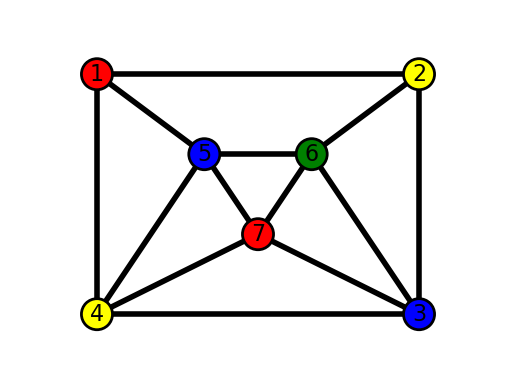

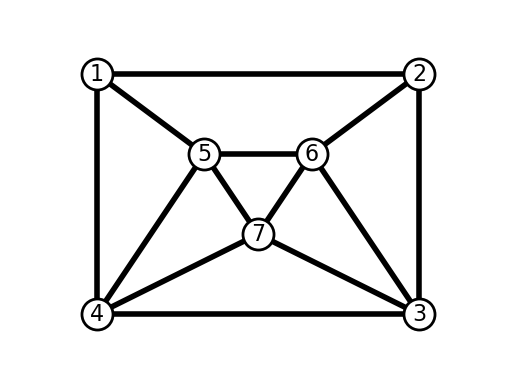

In [5]:
(requiredSolution, edges) = findSolution() #Retrieve solution
plotGraph(requiredSolution, edges) #Plot the colloured graph
plotGraphBlack(requiredSolution, edges)#Plot the black graph